In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

import seaborn as sns
import matplotlib.pyplot as plt

## **데이터셋 로드**

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/spp_project/mbti_concat.csv')

## **데이터 전처리**

In [ ]:
data

Unnamed: 0                                              posts  type
0                0  know intj tool use interaction people excuse a...  INTJ
1                1  rap music ehh opp yeah know valid well know fa...  INTJ
2                2  preferably p hd low except wew lad video p min...  INTJ
3                3  drink like wish could drink red wine give head...  INTJ
4                4  space program ah bad deal meing freelance max ...  INTJ
...            ...                                                ...   ...
114737      114737  'https://www.youtube.com/watch?v=t8edHB_h908||...  ISFP
114738      114738  'So...if this thread already exists someplace ...  ENFP
114739      114739  'So many questions when i do these things.  I ...  INTP
114740      114740  'I am very conflicted right now when it comes ...  INFP
114741      114741  'It has been too long since I have been on per...  INFP

[114742 rows x 3 columns]

In [ ]:
# 불필요한 컬럼 제거
data = data.drop(['Unnamed: 0'], axis=1)

In [ ]:
data

posts  type
0       know intj tool use interaction people excuse a...  INTJ
1       rap music ehh opp yeah know valid well know fa...  INTJ
2       preferably p hd low except wew lad video p min...  INTJ
3       drink like wish could drink red wine give head...  INTJ
4       space program ah bad deal meing freelance max ...  INTJ
...                                                   ...   ...
114737  'https://www.youtube.com/watch?v=t8edHB_h908||...  ISFP
114738  'So...if this thread already exists someplace ...  ENFP
114739  'So many questions when i do these things.  I ...  INTP
114740  'I am very conflicted right now when it comes ...  INFP
114741  'It has been too long since I have been on per...  INFP

[114742 rows x 2 columns]

## **불용어 제거**

In [ ]:
# 전처리 함수에서 사용할 contractions 생성
contractions = {"'cause": 'because',
 "I'd": 'I would',
 "I'd've": 'I would have',
 "I'll": 'I will',
 "I'll've": 'I will have',
 "I'm": 'I am',
 "I've": 'I have',
 "ain't": 'is not',
 "aren't": 'are not',
 "can't": 'cannot',
 "could've": 'could have',
 "couldn't": 'could not',
 "didn't": 'did not',
 "doesn't": 'does not',
 "don't": 'do not',
 "hadn't": 'had not',
 "hasn't": 'has not',
 "haven't": 'have not',
 "he'd": 'he would',
 "he'll": 'he will',
 "he's": 'he is',
 "here's": 'here is',
 "how'd": 'how did',
 "how'd'y": 'how do you',
 "how'll": 'how will',
 "how's": 'how is',
 "i'd": 'i would',
 "i'd've": 'i would have',
 "i'll": 'i will',
 "i'll've": 'i will have',
 "i'm": 'i am',
 "i've": 'i have',
 "isn't": 'is not',
 "it'd": 'it would',
 "it'd've": 'it would have',
 "it'll": 'it will',
 "it'll've": 'it will have',
 "it's": 'it is',
 "let's": 'let us',
 "ma'am": 'madam',
 "mayn't": 'may not',
 "might've": 'might have',
 "mightn't": 'might not',
 "mightn't've": 'might not have',
 "must've": 'must have',
 "mustn't": 'must not',
 "mustn't've": 'must not have',
 "needn't": 'need not',
 "needn't've": 'need not have',
 "o'clock": 'of the clock',
 "oughtn't": 'ought not',
 "oughtn't've": 'ought not have',
 "sha'n't": 'shall not',
 "shan't": 'shall not',
 "shan't've": 'shall not have',
 "she'd": 'she would',
 "she'd've": 'she would have',
 "she'll": 'she will',
 "she'll've": 'she will have',
 "she's": 'she is',
 "should've": 'should have',
 "shouldn't": 'should not',
 "shouldn't've": 'should not have',
 "so's": 'so as',
 "so've": 'so have',
 "that'd": 'that would',
 "that'd've": 'that would have',
 "that's": 'that is',
 "there'd": 'there would',
 "there'd've": 'there would have',
 "there's": 'there is',
 "they'd": 'they would',
 "they'd've": 'they would have',
 "they'll": 'they will',
 "they'll've": 'they will have',
 "they're": 'they are',
 "they've": 'they have',
 "this's": 'this is',
 "to've": 'to have',
 "wasn't": 'was not',
 "we'd": 'we would',
 "we'd've": 'we would have',
 "we'll": 'we will',
 "we'll've": 'we will have',
 "we're": 'we are',
 "we've": 'we have',
 "weren't": 'were not',
 "what'll": 'what will',
 "what'll've": 'what will have',
 "what're": 'what are',
 "what's": 'what is',
 "what've": 'what have',
 "when's": 'when is',
 "when've": 'when have',
 "where'd": 'where did',
 "where's": 'where is',
 "where've": 'where have',
 "who'll": 'who will',
 "who'll've": 'who will have',
 "who's": 'who is',
 "who've": 'who have',
 "why's": 'why is',
 "why've": 'why have',
 "will've": 'will have',
 "won't": 'will not',
 "won't've": 'will not have',
 "would've": 'would have',
 "wouldn't": 'would not',
 "wouldn't've": 'would not have',
 "y'all": 'you all',
 "y'all'd": 'you all would',
 "y'all'd've": 'you all would have',
 "y'all're": 'you all are',
 "y'all've": 'you all have',
 "you'd": 'you would',
 "you'd've": 'you would have',
 "you'll": 'you will',
 "you'll've": 'you will have',
 "you're": 'you are',
 "you've": 'you have'}

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

# NLTK의 불용어
stop_words = set(stopwords.words('english'))
print('불용어 개수 :', len(stop_words))
print(stop_words)

불용어 개수 : 179
{'more', 'into', 'isn', 'o', 'been', 'its', 'about', 'through', "didn't", 'have', 'further', 's', 'our', "wouldn't", 'how', 'mustn', 'were', 'couldn', 'their', 'but', 'yourself', 't', "you're", 'nor', 'themselves', 'aren', 'as', 'from', 'where', 'ourselves', 'not', 'why', 'some', 'yours', 'did', 'these', 'there', "shouldn't", 'while', 'the', 'ain', 'because', 'so', 'hers', 'hasn', 'he', 'll', 're', "doesn't", 'myself', 'had', 'any', 'are', 'won', "shan't", 'she', 'me', 'we', 'at', 'ours', 'shouldn', 'my', 'having', 'yourselves', 'am', "that'll", 'off', "should've", 'ma', 'those', 'a', 'be', 'was', 'your', "hasn't", 'with', 'once', 'will', 'of', 'each', 'in', 'himself', 'which', 'same', 'his', 'should', 'or', "mustn't", 'what', 'for', 'than', 'if', 'only', 'do', 'under', 'being', "aren't", 'before', 'no', 'too', 'over', 'by', "mightn't", 'is', 'and', 'now', 'them', 'that', 'mightn', 'shan', 'when', "don't", 'wouldn', 'has', "you've", 'y', 'out', 'it', 'can', "weren't", 'i',

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
import re
from bs4 import BeautifulSoup

# 전처리 함수
def preprocess_sentence(sentence, remove_stopwords = True):
    sentence = re.sub(r'https?:\/\/.*?[\s+]', '', sentence) # Links 제거
    sentence = sentence.lower() # 텍스트 소문자화
    sentence = BeautifulSoup(sentence, "lxml").text # <br />, <a href = ...> 등의 html 태그 제거
    sentence = re.sub(r'\([^)]*\)', '', sentence) # 괄호로 닫힌 문자열  제거 Ex) my friend(yugyeong) -> my friend
    sentence = re.sub('"','', sentence) # 쌍따옴표 " 제거
    sentence = ' '.join([contractions[t] if t in contractions else t for t in sentence.split(" ")]) # 약어 정규화
    sentence = re.sub(r"'s\b","",sentence) # 소유격 제거. Ex) yugyeong's -> yugyeong
    sentence = re.sub("[^a-zA-Z]", " ", sentence) # 영어 외 문자(숫자, 특수문자 등) 공백으로 변환
    sentence = re.sub('[m]{2,}', 'mm', sentence) # m이 3개 이상이면 2개로 변경. Ex) ummmmmmm -> umm

    pers_types = ['infp' ,'infj', 'intp', 'intj', 'istp', 'isfp', 'isfj','istp', 'entp', 'enfp', 'entj', 'enfj', 'estp', 'esfp' ,'esfj' ,'estj']
    for types in pers_types:
      sentence = sentence.replace(types, '')

    # 불용어 제거 (Text)
    if remove_stopwords:
        tokens = ' '.join(word for word in sentence.split() if not word in stop_words if len(word) > 1)
    # 불용어 미제거 (Summary)
    else:
        tokens = ' '.join(word for word in sentence.split() if len(word) > 1)
    return tokens

In [ ]:
# posts 열 전처리
clean_posts = []
for s in data['posts']:
    clean_posts.append(preprocess_sentence(s))
clean_posts[:5]

['know tool use interaction people excuse antisocial truly enlighten mastermind know would count pet peeze something time matter people either whether group people mall never see best friend sit outside conversation jsut listen want interject sit formulate say wait inject argument thought find fascinate sit watch people talk people fascinate sit class watch different people find intrigue dad stand look like line safeway watch people home talk people like think military job people voluntarily go job important show deference endanger live glorify way civilian think pretty ignorant general think military necessary defense mechanism political tactic feel like specifically invest much money could put money education whatnot though personally sound budget aernative really comment one way base two politician eye year ago come name somewhat important kinda role model nowadays pick keep score individual level mean little vary accord number condition day may score high others low sweat really go

In [ ]:
data['posts'] = clean_posts

In [ ]:
# 전처리 진행과정에서 결측치 생성 여부 확인
print(data.isnull().sum())

posts    0
type     0
dtype: int64


In [ ]:
data

posts  type
0       know tool use interaction people excuse antiso...  INTJ
1       rap music ehh opp yeah know valid well know fa...  INTJ
2       preferably hd low except wew lad video mind go...  INTJ
3       drink like wish could drink red wine give head...  INTJ
4       space program ah bad deal meing freelance max ...  INTJ
...                                                   ...   ...
114737  always think cats fi doms reason websites beco...  ISFP
114738  thread already exists someplace else list film...  ENFP
114739  many questions things would take purple pill p...  INTP
114740  conflicted right comes wanting children honest...  INFP
114741  long since personalitycafe although seem chang...  INFP

[114742 rows x 2 columns]

[reference] https://www.kaggle.com/code/rajshreev/mbti-personality-predictor-using-machine-learning

In [ ]:
import collections
from collections import Counter

# collections 모듈의 Counter를 사용하여 posts 열에서 중복이 많은 단어 40개 출력
words = list(data["posts"].apply(lambda x: x.split()))
words = [x for y in words for x in y]
Counter(words).most_common(40)

[('like', 759545),
 ('think', 640000),
 ('people', 596396),
 ('get', 560461),
 ('make', 419988),
 ('thing', 419029),
 ('know', 412179),
 ('one', 402060),
 ('feel', 394004),
 ('would', 379785),
 ('go', 377306),
 ('time', 376997),
 ('say', 368458),
 ('good', 359489),
 ('really', 354906),
 ('want', 305082),
 ('way', 281871),
 ('see', 254748),
 ('much', 249919),
 ('also', 246690),
 ('something', 243917),
 ('work', 240563),
 ('try', 227564),
 ('type', 224369),
 ('find', 222072),
 ('even', 221249),
 ('take', 219910),
 ('well', 214189),
 ('lot', 201187),
 ('friend', 199359),
 ('need', 199117),
 ('love', 189064),
 ('use', 188558),
 ('life', 182913),
 ('someone', 182827),
 ('mean', 173799),
 ('could', 170851),
 ('come', 165877),
 ('look', 162465),
 ('though', 159580)]

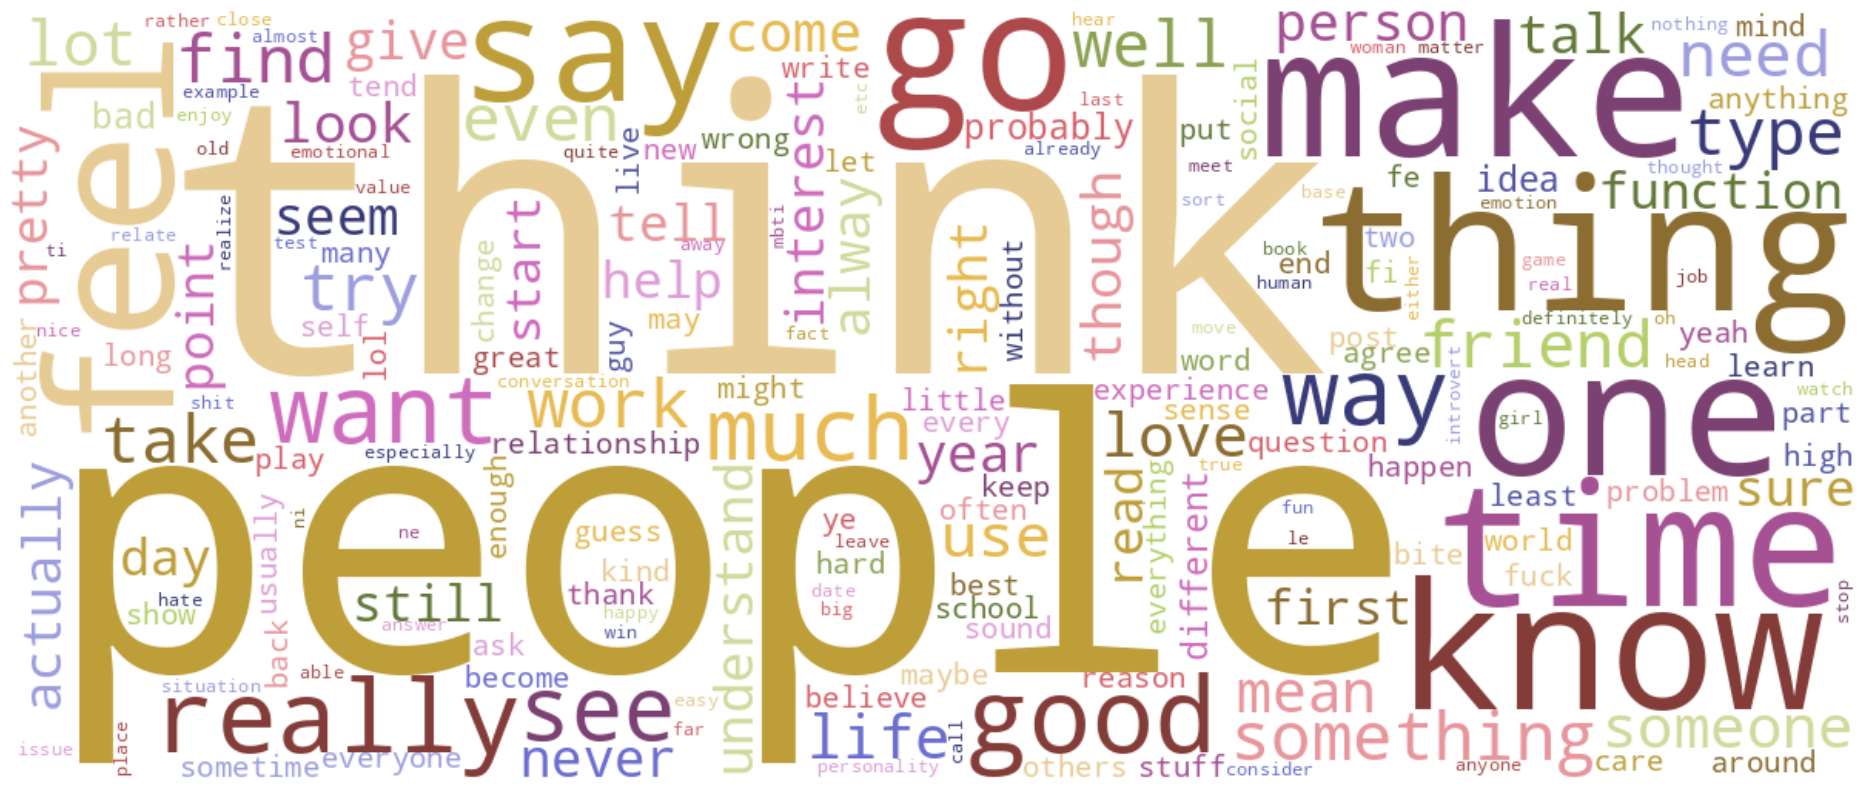

In [ ]:
import wordcloud
from wordcloud import WordCloud, STOPWORDS

wc = wordcloud.WordCloud(width=1200, height=500,
                         collocations=False, background_color="white",
                         colormap="tab20b").generate(" ".join(words))

plt.figure(figsize=(25,10))
# word cloud 생성
plt.imshow(wc, interpolation='bilinear')
_ = plt.axis("off")

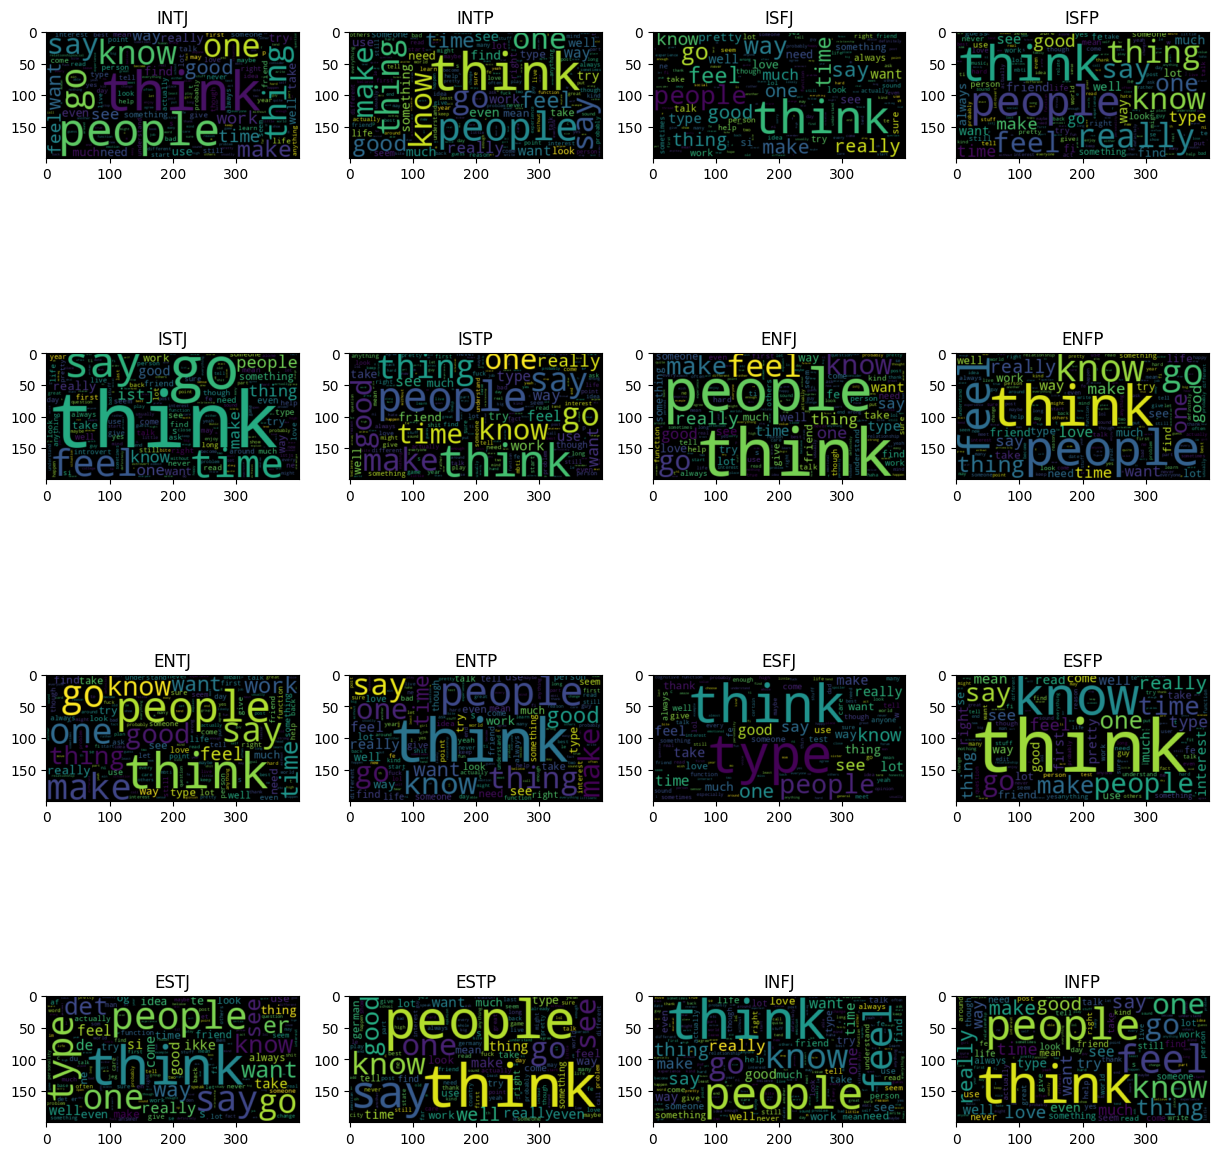

In [ ]:
fig, ax = plt.subplots(len(data['type'].unique()), sharex=True, figsize=(15,len(data['type'].unique())))
k = 0
for i in data['type'].unique():
    data_4 = data[data['type'] == i]
    wordcloud = WordCloud(max_words=1628,relative_scaling=1,normalize_plurals=False).generate(data_4['posts'].to_string())
    plt.subplot(4,4,k+1)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(i)
    ax[k].axis("off")
    k+=1

## **EDA**

In [ ]:
data.head()

posts  type
0  know tool use interaction people excuse antiso...  INTJ
1  rap music ehh opp yeah know valid well know fa...  INTJ
2  preferably hd low except wew lad video mind go...  INTJ
3  drink like wish could drink red wine give head...  INTJ
4  space program ah bad deal meing freelance max ...  INTJ

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114742 entries, 0 to 114741
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   posts   114742 non-null  object
 1   type    114742 non-null  object
dtypes: object(2)
memory usage: 1.8+ MB


In [ ]:
data.describe()

posts    type
count                                              114742  114742
unique                                             114742      16
top     know tool use interaction people excuse antiso...    INTP
freq                                                    1   26265

In [ ]:
data.isnull().sum().to_frame().rename(columns={0: "Count of Missing Values"})

Count of Missing Values
posts                        0
type                         0

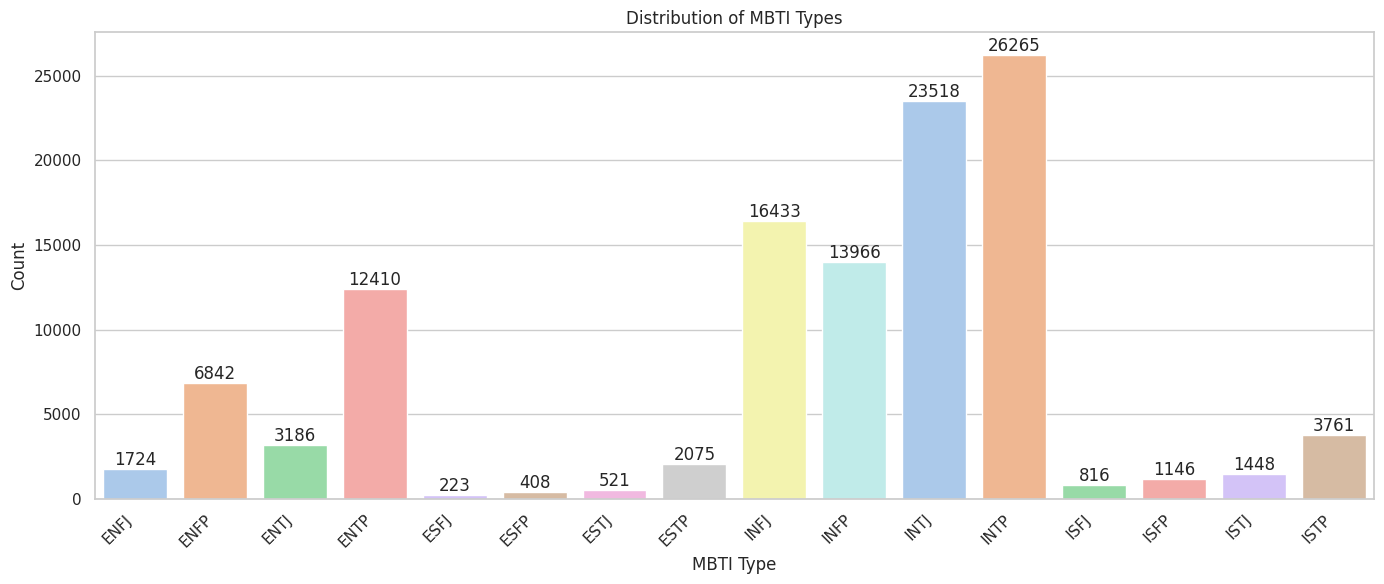

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# 스타일과 색상 설정
sns.set(style="whitegrid", palette="pastel")

# count plot 생성
plt.figure(figsize=(14, 6))
ax = sns.countplot(data=data, x='type', order=sorted(data['type'].unique()),
                   palette="pastel")
ax.set_title('Distribution of MBTI Types')
ax.set_xlabel('MBTI Type')
ax.set_ylabel('Count')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x()+p.get_width()/2, p.get_height()),
                ha='center', va='bottom', fontsize=12)
plt.tight_layout()

plt.show()

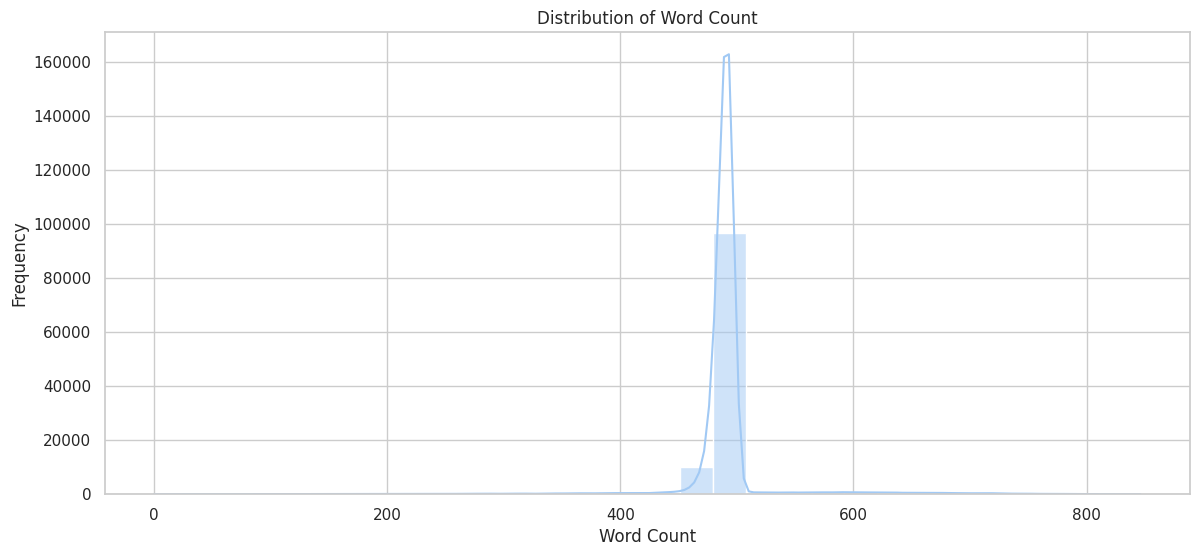

In [ ]:
data['word_count'] = data['posts'].apply(lambda x: len(x.split()))

plt.figure(figsize=(14, 6))
sns.histplot(data=data, x='word_count', bins=30, kde=True)
plt.title('Distribution of Word Count')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.show()

In [ ]:
import plotly.express as px

# 색상 설정
color_palette = px.colors.qualitative.Pastel

# 박스 플롯 생성
fig = px.box(data, x="type", y="word_count", color="type",
             title="Word Count Distribution by MBTI Personality Type",
             category_orders={"label": sorted(data["type"].unique())},
             color_discrete_sequence=color_palette)

# 라벨 이름 설정
fig.update_xaxes(title="MBTI Personality Type", showgrid=False,
                 tickfont=dict(size=12, color="black"))
fig.update_yaxes(title="Word Count", showgrid=False,
                 tickfont=dict(size=12, color="black"))

# 타이틀 설정
fig.update_layout(title_font=dict(size=24, color="darkblue"))

fig.show()

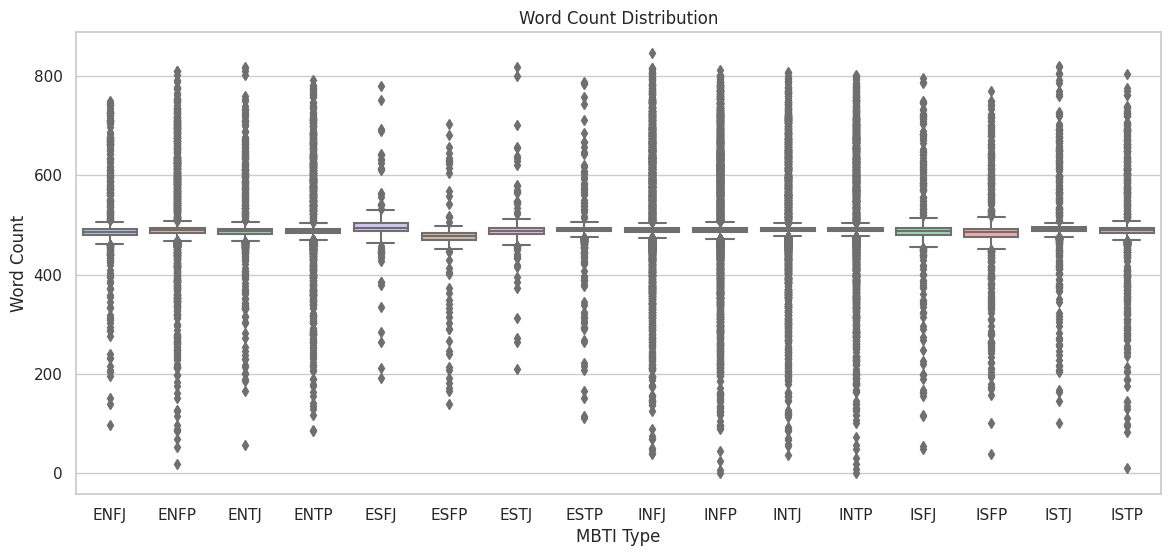

In [ ]:
# 색상 설정
color_palette = sns.color_palette("pastel")

# 박스 플롯 생성
plt.figure(figsize=(14, 6))
ax = sns.boxplot(data=data, x='type', y='word_count',
                 order=sorted(data['type'].unique()),
                 palette=color_palette)
ax.set_title('Word Count Distribution')
ax.set_xlabel('MBTI Type')
ax.set_ylabel('Word Count')
for patch in ax.artists:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, .7))

plt.show()

In [ ]:
data

posts  type
0       know tool use interaction people excuse antiso...  INTJ
1       rap music ehh opp yeah know valid well know fa...  INTJ
2       preferably hd low except wew lad video mind go...  INTJ
3       drink like wish could drink red wine give head...  INTJ
4       space program ah bad deal meing freelance max ...  INTJ
...                                                   ...   ...
114737  always think cats fi doms reason websites beco...  ISFP
114738  thread already exists someplace else list film...  ENFP
114739  many questions things would take purple pill p...  INTP
114740  conflicted right comes wanting children honest...  INFP
114741  long since personalitycafe although seem chang...  INFP

[114742 rows x 2 columns]

In [ ]:
# word_count열 제거 후, csv 파일로 저장
data = data.drop(['word_count'], axis=1)

In [ ]:
data

posts  type
0       know tool use interaction people excuse antiso...  INTJ
1       rap music ehh opp yeah know valid well know fa...  INTJ
2       preferably hd low except wew lad video mind go...  INTJ
3       drink like wish could drink red wine give head...  INTJ
4       space program ah bad deal meing freelance max ...  INTJ
...                                                   ...   ...
114737  always think cats fi doms reason websites beco...  ISFP
114738  thread already exists someplace else list film...  ENFP
114739  many questions things would take purple pill p...  INTP
114740  conflicted right comes wanting children honest...  INFP
114741  long since personalitycafe although seem chang...  INFP

[114742 rows x 2 columns]

In [ ]:
data.to_csv('data_result.csv')

# **모델링** : XGBoost

## **Feature Engineering**

In [ ]:
posts = data['posts'] # data features
MBTItype = data['type'] # labels

In [ ]:
posts_list = posts.to_numpy()
type_list = MBTItype.to_numpy()

In [ ]:
type_list

array(['INTJ', 'INTJ', 'INTJ', ..., 'INTP', 'INFP', 'INFP'], dtype=object)

In [ ]:
posts_list

array(['know tool use interaction people excuse antisocial truly enlighten mastermind know would count pet peeze something time matter people either whether group people mall never see best friend sit outside conversation jsut listen want interject sit formulate say wait inject argument thought find fascinate sit watch people talk people fascinate sit class watch different people find intrigue dad stand look like line safeway watch people home talk people like think military job people voluntarily go job important show deference endanger live glorify way civilian think pretty ignorant general think military necessary defense mechanism political tactic feel like specifically invest much money could put money education whatnot though personally sound budget aernative really comment one way base two politician eye year ago come name somewhat important kinda role model nowadays pick keep score individual level mean little vary accord number condition day may score high others low sweat rea

In [ ]:
import sklearn
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

# Vectorizing the database posts to a matrix of token counts for the model
cntizer = CountVectorizer(analyzer="word",
                             max_features=1000,
                             max_df=0.7,
                             min_df=0.1)
# the feature should be made of word n-gram
# Learn the vocabulary dictionary and return term-document matrix
print("Using CountVectorizer :")
X_cnt = cntizer.fit_transform(posts_list)

#The enumerate object yields pairs containing a count and a value (useful for obtaining an indexed list)
feature_names = list(enumerate(cntizer.get_feature_names_out()))
print("10 feature names can be seen below")
print(feature_names[0:10])


# For the Standardization or Feature Scaling Stage :-
# Transform the count matrix to a normalized tf or tf-idf representation
tfizer = TfidfTransformer()

# Learn the idf vector (fit) and transform a count matrix to a tf-idf representation
print("\nUsing Tf-idf :")

print("Now the dataset size is as below")
X_tfidf =  tfizer.fit_transform(X_cnt).toarray()
print(X_tfidf.shape)


Using CountVectorizer :
10 feature names can be seen below
[(0, 'ability'), (1, 'able'), (2, 'absolutely'), (3, 'accept'), (4, 'accurate'), (5, 'across'), (6, 'act'), (7, 'action'), (8, 'actual'), (9, 'actually')]

Using Tf-idf :
Now the dataset size is as below
(114742, 672)


In [ ]:
#counting top 10 words
reverse_dic = {}
for key in cntizer.vocabulary_:
    reverse_dic[cntizer.vocabulary_[key]] = key
top_10 = np.asarray(np.argsort(np.sum(X_cnt, axis=0))[0,-10:][0, ::-1]).flatten()
[reverse_dic[v] for v in top_10]

['love',
 'talk',
 'person',
 'always',
 'give',
 'never',
 'right',
 'actually',
 'seem',
 'understand']

## **XGBoost로 학습**

In [ ]:
#XGBoost를 사용하기 위해 LabelEncoder 사용
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(type_list)
type_list = le.transform(type_list)

In [ ]:
from sklearn.model_selection import train_test_split
X_data = X_tfidf
y_data = type_list
# X_data = data['posts'] # data features
# y_data = data['type'] # labels
X, X_test, y, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=1)
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=1) # test size = 0.3도 해보기

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np


xgb_model = XGBClassifier(n_estimators=100)
params = {'learning_rate': [0.1, 0.06,  0.02], 'max_depth':[3, 5, 7], 'colsample_bytree':[0.3, 0.5,0.75]} # 'n_estimators': [100, 300, 500],'min_child_weight':[1,3], // 'scale_pos_weight': [1, 5, 10] 를 작성해도 사용되지 않아 경고가 뜸.

# GridSearchCV 객체 생성
gridcv = GridSearchCV(xgb_model, param_grid=params, cv=3, scoring='f1_weighted')
 #다중 클래스 분류 문제에서 클래스 불균형이 있고 F1 스코어를 최적화하고자 한다면, scoring='f1_weighted'와 같이 설정하여 가중치를 적용한 평균 F1 스코어를 사용할 수 있습니다.

# 파라미터 튜닝 시작
gridcv.fit(X_train, y_train, early_stopping_rounds=30, eval_metric='mlogloss', eval_set=[(X_valid, y_valid)])

# 튜닝된 파라미터 출력
print(gridcv.best_params_)
print(gridcv.best_score_)

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
[2]	validation_0-mlogloss:2.50402
[3]	validation_0-mlogloss:2.43791
[4]	validation_0-mlogloss:2.38067
[5]	validation_0-mlogloss:2.32636
[6]	validation_0-mlogloss:2.28226
[7]	validation_0-mlogloss:2.24132
[8]	validation_0-mlogloss:2.20311
[9]	validation_0-mlogloss:2.16968
[10]	validation_0-mlogloss:2.13921
[11]	validation_0-mlogloss:2.11084
[12]	validation_0-mlogloss:2.08563
[13]	validation_0-mlogloss:2.06219
[14]	validation_0-mlogloss:2.04134
[15]	validation_0-mlogloss:2.01973
[16]	validation_0-mlogloss:2.00134
[17]	validation_0-mlogloss:1.98285
[18]	validation_0-mlogloss:1.96628
[19]	validation_0-mlogloss:1.95136
[20]	validation_0-mlogloss:1.93728
[21]	validation_0-mlogloss:1.92437
[22]	validation_0-mlogloss:1.91185
[23]	validation_0-mlogloss:1.90010
[24]	validation_0-mlogloss:1.88921
[25]	validation_0-mlogloss:1.87879
[26]	validation_0-mlogloss:1.86830
[27]	validation_0-mlogloss:1.85803
[28]	validation_0-mlogloss:1.84831
[29]	validation_0-mlogloss:

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

# 1차적으로 튜닝된 파라미터를 가지고 객체 생성
xgb_model = XGBClassifier(n_estimators=500, learning_rate=0.1, max_depth=7, min_child_weight=3, colsample_bytree=0.75, reg_alpha=0.03)

# 학습
xgb_model.fit(X, y, early_stopping_rounds=200, eval_metric='mlogloss', eval_set=[(X_test, y_test)])

[0]	validation_0-mlogloss:2.64607
[1]	validation_0-mlogloss:2.54525
[2]	validation_0-mlogloss:2.46388
[3]	validation_0-mlogloss:2.39500
[4]	validation_0-mlogloss:2.33490
[5]	validation_0-mlogloss:2.28098
[6]	validation_0-mlogloss:2.23333
[7]	validation_0-mlogloss:2.19113
[8]	validation_0-mlogloss:2.15271
[9]	validation_0-mlogloss:2.11865
[10]	validation_0-mlogloss:2.08732
[11]	validation_0-mlogloss:2.05923
[12]	validation_0-mlogloss:2.03306
[13]	validation_0-mlogloss:2.00884
[14]	validation_0-mlogloss:1.98620
[15]	validation_0-mlogloss:1.96549
[16]	validation_0-mlogloss:1.94632
[17]	validation_0-mlogloss:1.92848
[18]	validation_0-mlogloss:1.91187
[19]	validation_0-mlogloss:1.89611
[20]	validation_0-mlogloss:1.88177
[21]	validation_0-mlogloss:1.86840
[22]	validation_0-mlogloss:1.85523
[23]	validation_0-mlogloss:1.84370
[24]	validation_0-mlogloss:1.83299
[25]	validation_0-mlogloss:1.82201
[26]	validation_0-mlogloss:1.81224
[27]	validation_0-mlogloss:1.80294
[28]	validation_0-mlogloss:1.7

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.75, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=3, missing=nan, monotone_constraints=None,
              n_estimators=500, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score

xgb_pred = xgb_model.predict(X_test)

accuracy = accuracy_score(y_test, xgb_pred)
precision = precision_score(y_test, xgb_pred, average='weighted')
recall = recall_score(y_test, xgb_pred, average='weighted')
f1 = f1_score(y_test, xgb_pred, average = 'weighted')

print(accuracy)
print(precision)
print(recall)
print(f1)
print('정확도 : {:.4f}\n정밀도 : {:.4f}\n재현율 : {:.4f}\nf1-score : {:.4f}'.format(accuracy, precision, recall, f1))

0.5046842999694976
0.530326460924783
0.5046842999694976
0.48016468034190535
정확도 : 0.5047
정밀도 : 0.5303
재현율 : 0.5047
f1-score : 0.4802


XGBoost와 같은 그래디언트 부스팅 알고리즘은 주로 수치형 데이터에 대한 모델링에 뛰어난 성능을 보이는 반면, 텍스트와 같은 비정형 데이터에는 다소 한계가 있을 수 있다. 따라서, 기존에 사용하던 SVM의 LinearSVC, RNN을 사용하는 것이 나을 것 같다는 생각이 들었음.

# 모델링: RNN

In [ ]:
import pandas as pd

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import classification_report

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/spp_project/data_result.csv', index_col='type') #type열을 인덱스로 설정.

In [ ]:
data = data.drop(['Unnamed: 0'], axis=1)

In [ ]:
data

posts
type                                                   
INTJ  know tool use interaction people excuse antiso...
INTJ  rap music ehh opp yeah know valid well know fa...
INTJ  preferably hd low except wew lad video mind go...
INTJ  drink like wish could drink red wine give head...
INTJ  space program ah bad deal meing freelance max ...
...                                                 ...
INFP  refuel ne motivation general nature mind bui n...
INFP  confidence btw loon oh god absolutely also str...
INFP  person see actually help build confidence able...
INFP  eat good come lose weight lonerm excercise sep...
NaN                                                 NaN

[98166 rows x 1 columns]

In [ ]:
data = data.dropna(axis=0)

In [ ]:
data.isnull().sum()

posts    0
dtype: int64

In [ ]:
# Split data into features (X) and labels (y)
X = data['posts'] #설명변수
y = data.index #예측변수

In [ ]:
# Tokenization and padding
max_words = 10000  # Max number of words in the vocabulary
max_len = 500  # Max length of each sequence

In [ ]:
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X)
sequences = tokenizer.texts_to_sequences(X)
X_padded = pad_sequences(sequences, maxlen=max_len, padding='post')

## **train, validation, test 데이터셋 분리**

In [ ]:
# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_padded, y, test_size=0.2, random_state=42)

In [ ]:
# numpy배열로 변환
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [ ]:
# Convert labels to integer format
label_to_int = {label: i for i, label in enumerate(y.unique())}
y_train_int = np.array([label_to_int[label] for label in y_train])
y_test_int = np.array([label_to_int[label] for label in y_test])

## **1안**

In [ ]:
# 모델 정의
model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=256, input_length=max_len))
model.add(LSTM(64, dropout=0.2))
model.add(Dense(len(label_to_int), activation='softmax'))  # Use len(label_to_int) as the number of units

# 모델 컴파일
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

# EarlyStopping과 ReduceLROnPlateau는 모델 학습 중에 사용되는 콜백(callback) 함수.
# 학습 과정에서 모니터링하고 특정 조건을 충족할 때 학습을 조기에 중단하거나 학습률을 조절하는 역할을 함.

# Early stopping callback 설정 -> validation data로 검증시 성능이 개선되지 않을 때, 학습을 조기 중단
early_stopping = EarlyStopping(monitor='val_loss', patience=2, verbose=1)

# Learning rate reduction callback 설정
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=1, verbose=1)

# 모델 학습
batch_size = 64
epochs = 20
model.fit(X_train, y_train_int, batch_size=batch_size, epochs=epochs,
          validation_split=0.2, callbacks=[early_stopping, reduce_lr])


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 500, 256)          2560000   
                                                                 
 lstm_3 (LSTM)               (None, 64)                82176     
                                                                 
 dense_3 (Dense)             (None, 16)                1040      
                                                                 
Total params: 2,643,216
Trainable params: 2,643,216
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
982/982 [==============================] - 335s 339ms/step - loss: 2.1024 - accuracy: 0.2472 - val_loss: 2.0789 - val_accuracy: 0.2585 - lr: 0.0010
Epoch 2/20
982/982 [==============================] - 343s 349ms/step - loss: 2.0100 - accuracy: 0.2903 - val_loss: 1.8237 - val_accuracy: 0.3575 - l

In [ ]:
# 클래스 예측
pred_probs = model.predict(X_test)
pred_classes = np.argmax(pred_probs, axis=1)

# classification report 계산 및 출력
report = classification_report(y_test_int, pred_classes, target_names=label_to_int.keys())
print(report)

614/614 [==============================] - 41s 66ms/step
              precision    recall  f1-score   support

        INTJ       0.61      0.67      0.64      4506
        INTP       0.64      0.66      0.65      5060
        ISFJ       0.00      0.00      0.00       140
        ISFP       0.11      0.03      0.05       176
        ISTJ       0.46      0.26      0.33       237
        ISTP       0.44      0.43      0.43       716
        ENFJ       0.36      0.17      0.23       316
        ENFP       0.45      0.43      0.44      1191
        ENTJ       0.60      0.50      0.54       616
        ENTP       0.63      0.59      0.61      2375
        ESFJ       0.00      0.00      0.00        35
        ESFP       0.17      0.04      0.07        68
        ESTJ       0.82      0.69      0.75        96
        ESTP       0.87      0.79      0.83       393
        INFJ       0.58      0.71      0.64      2864
        INFP       0.36      0.26      0.30       844

    accuracy           

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## **2안**

In [ ]:
# 모델 정의
model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=256, input_length=max_len))
model.add(LSTM(128, dropout=0.5, return_sequences=True))
model.add(LSTM(128, dropout=0.5))
model.add(Dense(len(label_to_int), activation='softmax'))  # Use len(label_to_int) as the number of units

# 모델 컴파일
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

# Early stopping callback 설정 -> validation data로 검증시 성능이 개선되지 않을 때, 학습을 조기 중단
early_stopping = EarlyStopping(monitor='val_loss', patience=2, verbose=1)

# Learning rate reduction callback 설정
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=1, verbose=1)

# 모델 학습
batch_size = 64
epochs = 30
model.fit(X_train, y_train_int, batch_size=batch_size, epochs=epochs,
          validation_split=0.2, callbacks=[early_stopping, reduce_lr])


Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_14 (Embedding)    (None, 500, 256)          2560000   
                                                                 
 lstm_15 (LSTM)              (None, 500, 128)          197120    
                                                                 
 lstm_16 (LSTM)              (None, 128)               131584    
                                                                 
 dense_13 (Dense)            (None, 16)                2064      
                                                                 
Total params: 2,890,768
Trainable params: 2,890,768
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
982/982 [==============================] - 1164s 1s/step - loss: 2.0686 - accuracy: 0.2531 - val_loss: 2.0465 - val_accuracy: 0.2649 - lr: 0.0010
Epoch 2/30
982/982

In [ ]:
# 클래스 예측
pred_probs = model.predict(X_test)
pred_classes = np.argmax(pred_probs, axis=1)

# classification report 계산 및 출력
report = classification_report(y_test_int, pred_classes, target_names=label_to_int.keys())
print(report)

614/614 [==============================] - 42s 67ms/step
              precision    recall  f1-score   support

        INTJ       0.26      0.00      0.00      4506
        INTP       0.29      0.01      0.03      5060
        ISFJ       0.02      0.01      0.01       140
        ISFP       0.01      0.24      0.02       176
        ISTJ       0.02      0.38      0.03       237
        ISTP       0.07      0.24      0.11       716
        ENFJ       0.02      0.18      0.04       316
        ENFP       0.00      0.00      0.00      1191
        ENTJ       0.05      0.11      0.07       616
        ENTP       0.14      0.03      0.04      2375
        ESFJ       0.01      0.17      0.02        35
        ESFP       0.01      0.24      0.02        68
        ESTJ       0.39      0.44      0.41        96
        ESTP       0.49      0.49      0.49       393
        INFJ       0.20      0.00      0.00      2864
        INFP       0.06      0.13      0.08       844

    accuracy           

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
